# JUAN SEBASTIAN HERRERA SANCHEZ

## Analisis de datos en Python, caso titanic.

In [19]:
## VOCABULARIO
### Supervivencia	0 = No, 1 = Sí
### pclase	clase de boleto	1 = 1°, 2 = 2°, 3 = 3°
### sexo	Sexo	
### Edad	Edad en años	
### sibsp	# de hermanos/cónyuges a bordo del Titanic	
### tostar	# de padres/hijos a bordo del Titanic	
### boleto	Numero de ticket	
### tarifa	tarifa de pasajero	
### cabina	Número de cabina	
### embarcado	Puerto de embarque	C = Cherburgo, Q = Queenstown, S = Southampton
### Notas Variables
### pclass : un indicador del nivel socioeconómico (SES)
### 1.° = superior
### 2.° = medio
### 3.° = inferior
### edad : la edad es fraccionaria si es menor que 1. Si se estima la edad, tiene la forma de xx,5
### sibsp : el conjunto de datos define las relaciones familiares de esta manera...
### Hermano = hermano, hermana, hermanastro, hermanastra
### Cónyuge = esposo, esposa (se ignoraron las amantes y los prometidos)
### parch : El conjunto de datos define las relaciones familiares de esta manera...
### Padre = madre, padre
### Hijo = hija, hijo, hijastra, hijastro
### Algunos niños viajaron solo con una niñera, por lo tanto, parch=0 para ellos.

# Descripicion de datos

In [ ]:
## Descripción general
### Los datos se han dividido en dos grupos:

## *conjunto de entrenamiento (train.csv)
## *conjunto de prueba (test.csv)

### El conjunto de entrenamiento debe usarse para construir sus modelos de aprendizaje automático. 
### Para el conjunto de entrenamiento, proporcionamos el resultado (también conocido como "verdad sobre el terreno") 
### para cada pasajero. Su modelo se basará en "características" como el género y la clase de los pasajeros. También puede 
### utilizar la ingeniería de características para crear nuevas características.

### El conjunto de prueba debe usarse para ver qué tan bien se desempeña su modelo en datos no vistos. Para el conjunto de 
### prueba, no proporcionamos la verdad en tierra para cada pasajero. Es su trabajo predecir estos resultados. Para cada 
### pasajero en el conjunto de prueba, use el modelo que entrenó para predecir si sobrevivieron o no al hundimiento del Titanic.

### También incluimos gender_submission.csv , un conjunto de predicciones que asumen que todas y solo las mujeres sobreviven, 
### como un ejemplo de cómo debería verse un archivo de envío.

### link de apoyo: https://github.com/gonzalezgouveia/proyecto-titanic

## Pasos de estudio

In [17]:
#### 1. Carga de datos
#### 2. Exploracion
#### 3. Procesamiento
#### 4. Modelos
#### 5. Evaluacion
#### 6. Prediccion
#### 7. Conclusion y proximos pasos

## 1. Cargando datos

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [189]:
train=pd.read_csv("C:/Users/LAURA/Desktop/cursos data science/3_ejerc_analisis_Datos/train.csv")
test=pd.read_csv("C:/Users/LAURA/Desktop/cursos data science/3_ejerc_analisis_Datos/test.csv")

In [190]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Explorando datos

In [191]:
# que columnas tienen los datos?
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [192]:
# Que tamaño tienen los datos?
train.shape

(891, 12)

In [193]:
# Hay valores nulos en los datos?
train.info()
#para ver datos nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [194]:
# Hay valores nulos en los datos?
train.describe()
#distribucion de variables numericas

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [195]:
# como se comportan las variables categoricas
train.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [196]:
# En cabina faltan y en embargo tambien faltan oersonas.
# Habian dos categorias de sexo
# Habian tres categorias de embarque de donde salia la gente
# top son los que mas se repiten y freq la grecuencia

## 2.1. EDA: Estudio de variable target

In [197]:
# Para saber como se comportaron los sobrevivientes respecto a otras variables

In [198]:
# cuantos hay:
train.groupby(["Survived"]).count()["PassengerId"]

Survived
0    549
1    342
Name: PassengerId, dtype: int64

In [199]:
# 549 no sobrevivieron
# 342 pasajeros que sobrevivieron

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64


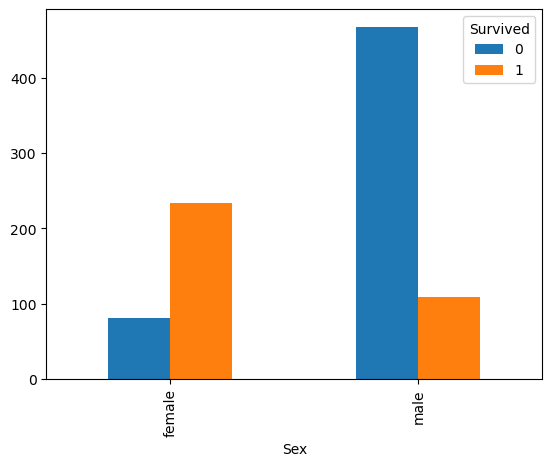

In [200]:
train.groupby(["Survived","Sex"]).count()["PassengerId"]

grouped_sex=train.groupby(["Survived","Sex"]).count()["PassengerId"] #agrupacion dos variables y conteo
print(grouped_sex)
(grouped_sex.unstack(level=0).plot.bar()) #transpone los datos para que quede en forma de matriz sin repeticiones
plt.show()

In [201]:
# De los que no sobrevivieron  hay mas hombres
# De los que sobrevivieron hay mas mujeres

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: PassengerId, dtype: int64


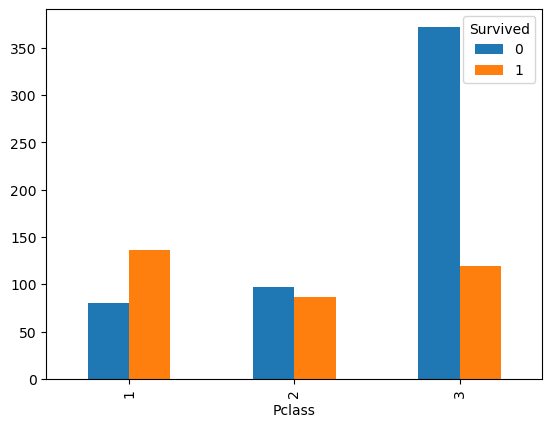

In [202]:
# para otras variables:
train.groupby(["Survived","Pclass"]).count()["PassengerId"]

grouped_sex=train.groupby(["Survived","Pclass"]).count()["PassengerId"] #agrupacion dos variables y conteo
print(grouped_sex)
(grouped_sex.unstack(level=0).plot.bar()) #transpone los datos para que quede en forma de matriz sin repeticiones
plt.show()

In [203]:
#Sobrevivieron en clase baja casi 150, en clase media casi 100 y en clase alta mas de 100 y menos de 150

## 3. Procesamiento de datos

In [204]:
train[["Survived","Sex","Age","Pclass"]].head(3)

,Survived,Sex,Age,Pclass
0,0,male,22.0,3
1,1,female,38.0,1
2,1,female,26.0,3


In [205]:
### para datos nulos:
train[["Survived","Sex","Age","Pclass"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


In [206]:
### hay datos nulos en la edad y es de tipo flotante.
# Deben estar los datos en entero o flotante.

In [207]:
(train[train["Age"].isna()]
 .groupby(["Sex","Pclass"])
 .count()["PassengerId"]
 .unstack(level=0))
# ver datos nulos en edad

Sex,female,male
Pclass,,
1,9,21
2,2,9
3,42,94


In [208]:
## esa variable se distribuye mejor en pasajeros de 3 clase y mayormente hombres

In [209]:
(train[train["Age"].isna()]
 .groupby(["SibSp","Parch"])
 .count()["PassengerId"]
 .unstack(level=0))

SibSp,0,1,2,3,8
Parch,,,,,
0,133.0,21.0,3.0,NaN,NaN
1,1.0,3.0,NaN,4.0,NaN
2,3.0,2.0,NaN,NaN,7.0


In [210]:
# parientes, ya sea hermano, esposa, etc. De las personas que no reportaron su edad, se distribuye mas 
# en personas que viajaba sola

In [211]:
# calcular la mediana de Age para imputar
train["Age"].median()
# buena edad que corresponde a hombres de 3 clase que viajan solos
# por ende, imputarla no es tan mala
# Se imputa para que el modelo tenga algo con que entrenar.
# si se imputa algo incorrecto se sesga el modelo.

28.0

In [212]:
# imputar valor para rellenarr nulos
train["Age"] = train["Age"].fillna(28.0)
train[["Survived","Sex","Age","Pclass"]].info()
# el 28 lo hemos puesto con cuidado
# no perdimos la informacion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


In [213]:
# map para label encoding
train["Sex"]=train["Sex"].map({"female":1,"male":0}).astype(int)
#para cambiar de object a entero
# a la variable de genero o sexo se le pasa un mapeo.
#todas las mujeres se mapean a 1
#todos los hombres se mapean a 0

In [214]:
train[["Survived","Sex","Age","Pclass"]].head(3)


,Survived,Sex,Age,Pclass
0,0,0,22.0,3
1,1,1,38.0,1
2,1,1,26.0,3


Survived  FlagSolo
0         0           175
          1           374
1         0           179
          1           163
Name: PassengerId, dtype: int64


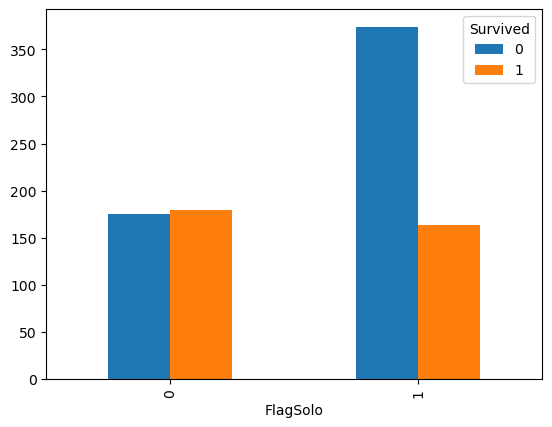

In [215]:
# crear nueva variable tipo flag "viaja sola"
train["FlagSolo"]=np.where(
    (train["SibSp"]==0)&(train["Parch"]==0),1,0)
#nueva variable "flagsolo" - dicotomica, 1 cuando se cumple condicion
#viaja solo sin siblings o esposa o sin parientes o hijos
train.groupby(["Survived","Pclass"]).count()["PassengerId"]

grouped_flag=train.groupby(["Survived","FlagSolo"]).count()["PassengerId"] 
print(grouped_flag)
(grouped_flag.unstack(level=0).plot.bar()) #transpone los datos para que quede en forma de matriz sin repeticiones
plt.show()


In [216]:
# los que tienen flagsolo=0 "no viajan solos" su supervivencia es mas o menos igual
#pero los que si viajan solo tienen el 0 mas elevado, mas tendencia a no sobrevivir
train[["Survived","Sex","Age","Pclass","FlagSolo"]].head(3)

,Survived,Sex,Age,Pclass,FlagSolo
0,0,0,22.0,3,0
1,1,1,38.0,1,0
2,1,1,26.0,3,1


In [217]:
# Variable dependiente:
Y_train=train["Survived"]

# Preprocesamiento de variables independientes
features = ["Sex","Age","Pclass","FlagSolo"]
X_train=train[features]

print(Y_train.shape, X_train.shape)
#una con solo una variable y 891 registros
# la otra con varias variables y la misma cantidad de registros

(891,) (891, 4)


## 4. Modelos

In [218]:
# entrenando modelo regresion logistica
from sklearn.linear_model import LogisticRegression #libreria sklearn y modulo linear model, en donde esta el objeto de logistic regresion

logreg = LogisticRegression() #se crea instancia del objeto
logreg.fit(X_train, Y_train) #entrenamiento

LogisticRegression()

In [219]:
# Entrenando modelo arboles de decision
from sklearn.tree import DecisionTreeClassifier #submodulo de tree y vemos el decisiontreeclassifier
decision_tree = DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier()

## 5. Evaluaciòn

In [220]:
from sklearn.metrics import plot_confusion_matrix #submodulo de metricas

def conf_mat_acc(modelo):
    disp = plot_confusion_matrix(modelo,X_train, Y_train,
                                 cmap=plt.cm.Blues, values_format="d")
    true_pred = disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]
    total_data = np.sum(disp.confusion_matrix)
    accuracy = true_pred/total_data
    print("accuracy: ",np.round(accuracy,2))
    plt.show()

In [221]:
#matriz en donde vamos a tener los valores predichos "dice modelo" y los valores reales "lo que tenemos de antemano",
# si se cumple 1

C:\Users\LAURA\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


accuracy:  0.79


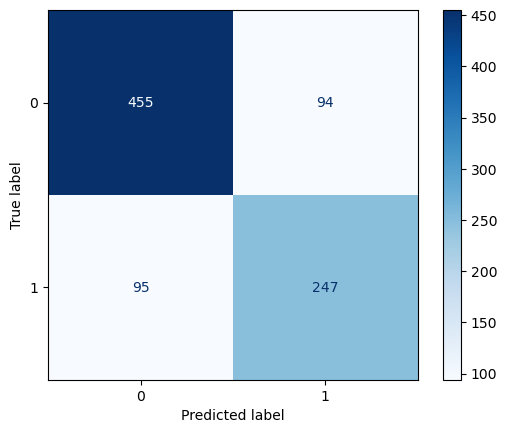

In [222]:
conf_mat_acc(logreg)

In [223]:
#accuracy: es la precision
#0,79: 455+247/(455+94+95+247)
#true label: valor real
#predict label: el predicho
# el 455 significa que en los datos reales hay 455 que estan etiquetados como cero
# y que nuestro modelo ha predicho correctamente como 0
# 247 datos que en nuestra tabla estaban marcado como 1 "si sobrevivio" y que lo predijo el modelo
#es que tambien sobrevivio

# por otra parte, las esquinas son los errores
# 94 estaban marcados como cero pero el modelo predijo incorrectamente como 1
# el 95 son los que en la tabla eran 1 y predijimos como 0

C:\Users\LAURA\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


accuracy:  0.89


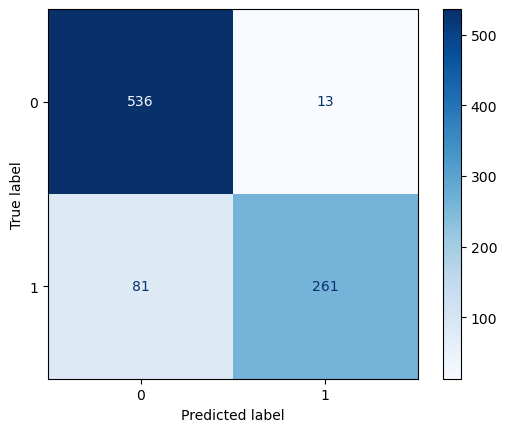

In [224]:
conf_mat_acc(decision_tree)

In [225]:
## tenemos menor error en principio, ya que presenta un mejor accuaracy y menor error

## 5.1 Evaluacion sobre el test set

In [226]:
# ahora hay que preparar el test set para evaluación
print(test.head(3))
test.info()

   PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2          894       2         Myles, Mr. Thomas Francis    male  62.0      0   

   Parch  Ticket    Fare Cabin Embarked  
0      0  330911  7.8292   NaN        Q  
1      0  363272  7.0000   NaN        S  
2      0  240276  9.6875   NaN        Q  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 no

In [180]:
# datos parecidos al anterior pero sin la variable de supervivencia

In [227]:
#(train[train["Age"].isna()]
 #.groupby(["Sex","Pclass"])
 #.count()["PassengerId"]
 #.unstack(level=0))

# ver datos nulos en edad
#train["Age"] = train["Age"].fillna(28.0)
#train[["Sex","Age","Pclass"]].info()

# hacer map a Sex
test["Sex"] = test["Sex"].map({"female": 1, "male": 0}).astype(int) #se vuelve entero el objeto

# rellenar Age
test['Age'] = test['Age'].fillna(28.0)

# Crear FlagSolo
test['FlagSolo'] = np.where(
    (test['SibSp'] == 0) & (test['Parch'] == 0), 1, 0)

In [228]:
print(test.info())
test[features].head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int32  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  FlagSolo     418 non-null    int32  
dtypes: float64(2), int32(2), int64(4), object(4)
memory usage: 36.0+ KB
None


,Sex,Age,Pclass,FlagSolo
0,0,34.5,3,1
1,1,47.0,3,0
2,0,62.0,2,1


In [229]:
# crear test set 
X_test = test[features]

print(X_test.shape)

(418, 4)


In [230]:
# prediccion de Survived en test set
Y_pred_log = logreg.predict(X_test)
Y_pred_tree = decision_tree.predict(X_test)
print(Y_pred_log[0:10])
## prediccion para ambos modelos

[0 0 0 0 1 0 1 0 1 0]


## 6. Predicción

In [231]:
# prediciendo sobre el test set
print(Y_pred_log[0:20]) #primeros 20 pasajeros
print(Y_pred_tree[0:20])

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0]
[0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0]


In [232]:
# para descargar en ordenador
def download_output(y_pred, name):
  output = pd.DataFrame({'PassengerId': test.PassengerId, 
                         'Survived': y_pred})
  output.to_csv(name, index=False)
#esa funcion genera el dataframe con id pasajero y prediccion   

In [234]:
download_output(Y_pred_log, 'seba_pred_log.csv')
download_output(Y_pred_tree, 'seba_pred_tree.csv')

## Conclusion

### proximos pasos

In [ ]:
Ahora, lo que vendría sería desplegar este modelo a producción, hacer predicciones según lo necesite el usuario, hacer seguimiento y realizar el mantenimiento del despliegue.

Similar a como se describe superficialmente aquí https://cloud.google.com/ai-platform/docs/ml-solutions-overview

Sin embargo, estás etapas corresponden abarcan pasos relacionados a la ingeniería de software o devops que no serán cubiertos en este notebook.